In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

%matplotlib inline

In [2]:
from semisupervised import PUAdapter
from semisupervised import SSGMM

## Generate some dummy data

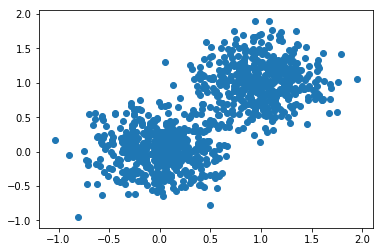

In [3]:
X, y = make_blobs(n_samples=1000, centers=[(0,0), (1,1)], cluster_std=0.3)
plt.scatter(X[:,0], X[:,1])

## Positive-Unlabelled adaptation of supervised classifier

In [4]:
def get_pu_labels(y, seed_prop=0.1):
    """Given ground truth, select sample at random to be labelled positive."""
    seeds = np.zeros(y.shape)
    
    positives = np.where(y == 1)[0]
    np.random.shuffle(positives)
    seed_count = int(seed_prop * len(positives))
    seeds[positives[:seed_count]] = 1
    
    return seeds

In [5]:
# Get labels
labels = get_pu_labels(y, 0.1)

In [6]:
# Train model
clf = LinearSVC()
pu_clf = PUAdapter(clf)
pu_clf.fit(X, labels)

Positive-Unlabelled adaptation of CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv=3, method='sigmoid')

In [7]:
# Make predictions
pred = pu_clf.predict(X)

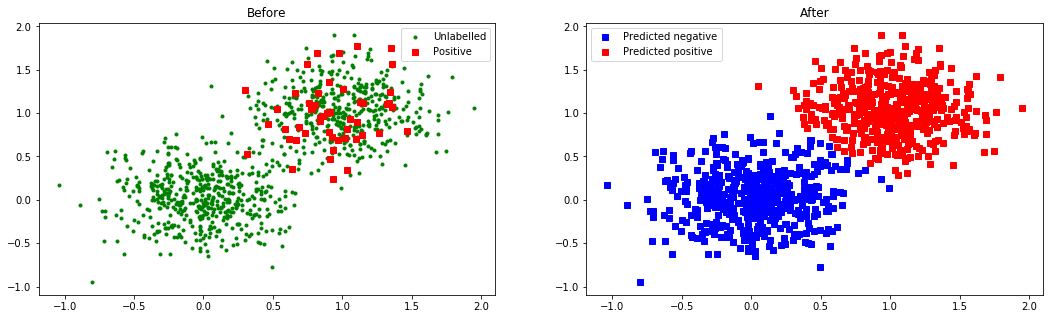

In [8]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax0, ax1 = ax[0], ax[1]

ax0.plot(X[labels!=1,0], X[labels!=1,1], 'g.', label='Unlabelled')
ax0.plot(X[labels==1,0], X[labels==1,1], 'rs', label='Positive')
ax0.legend(loc='best', numpoints=1)
ax0.set_title('Before')

ax1.plot(X[pred!=1,0], X[pred!=1,1], 'bs', label='Predicted negative')
ax1.plot(X[pred==1,0], X[pred==1,1], 'rs', label='Predicted positive')
ax1.legend(loc='best', numpoints=1)
ax1.set_title('After')

## Semi-supervised adaptation of (unsupervised) Gaussian Mixture Model

In [9]:
def get_ssgmm_labels(y, seed_prop=0.1):
    """Given ground truth, select sample at random to be labelled."""
    seeds = -np.ones(y.shape)
    
    positives = np.where(y == 1)[0]
    np.random.shuffle(positives)
    seed_count = int(seed_prop/2 * len(positives))
    seeds[positives[:seed_count]] = 1
    
    negatives = np.where(y == 0)[0]
    np.random.shuffle(negatives)
    seed_count = int(seed_prop/2 * len(negatives))
    seeds[negatives[:seed_count]] = 0
    
    return seeds

In [10]:
# Get labels
labels = get_ssgmm_labels(y, 0.1)

In [11]:
# Train model
ssgmm = SSGMM(n_components=2, covariance_type='full', n_init=3)
ssgmm.fit(X, y=labels)

SSGMM(covariance_type='full', init_params='wmc', min_covar=0.001,
   n_components=2, n_init=3, n_iter=100, params='wmc', random_state=None,
   tol=0.001, verbose=0)

In [12]:
# Make predictions
pred = ssgmm.predict(X)

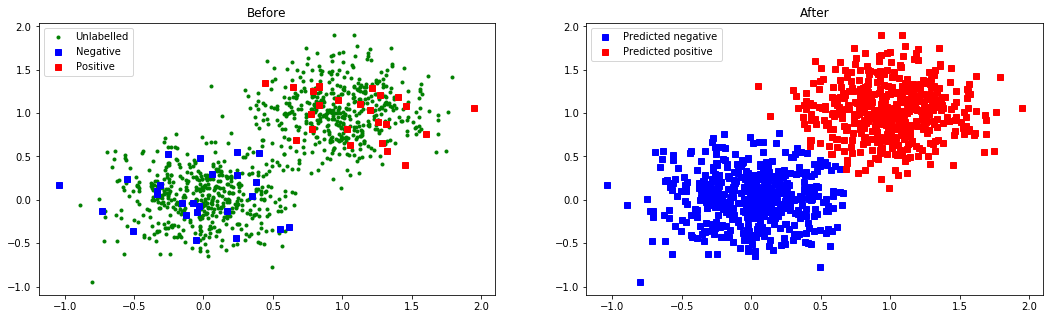

In [13]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax0, ax1 = ax[0], ax[1]

ax0.plot(X[labels==-1,0], X[labels==-1,1], 'g.', label='Unlabelled')
ax0.plot(X[labels==0,0], X[labels==0,1], 'bs', label='Negative')
ax0.plot(X[labels==1,0], X[labels==1,1], 'rs', label='Positive')
ax0.legend(loc='best', numpoints=1)
ax0.set_title('Before')

ax1.plot(X[pred!=1,0], X[pred!=1,1], 'bs', label='Predicted negative')
ax1.plot(X[pred==1,0], X[pred==1,1], 'rs', label='Predicted positive')
ax1.legend(loc='best', numpoints=1)
ax1.set_title('After')